* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
### 위 사이트에는 pandas의 join, merge, concat에 대한 설명이 되어 있습니다.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from datetime import date, datetime, timedelta

In [3]:
#폰트 설정
font_path = "../util/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 문제 1 
* 스타벅스 매월 매장 오픈 개수의 추이를 라인 차트로 표시하세요 

In [4]:
url = "https://www.starbucks.co.kr/store/getSidoList.do"
r = requests.post(url)

In [5]:
url= 'https://www.starbucks.co.kr/store/getStore.do?r=804IUG79N7'
payload = {
        'in_biz_cds' : '0',
        'in_scodes' : '0',
        'ins_lat' : '37.5627128',
        'ins_lng' : '126.93279869999999',
        'search_text' : '',
        'p_sido_cd' : '01',
        'p_gugun_cd' : '',
        'in_distance' : '0',
        'in_biz_cd' : '',
        'isError' : 'true',
        'searchType' : 'C',
        'set_date' : '',
        'all_store' : '0',
        'T03' : '0',
        'T01' : '0',
        'T12' : '0',
        'T09' : '0',
        'T30' : '0',
        'T05' : '0',
        'T22' : '0',
        'T21' : '0',
        'T10' : '0',
        'T36' : '0',
        'P10' : '0',
        'P50' : '0',
        'P20' : '0',
        'P60' : '0',
        'P30' : '0',
        'P70' : '0',
        'P40' : '0',
        'P80' : '0',
        'whcroad_yn' : '0',
        'P90' : '0',
        'new_bool' : '0',
        'iend' : '1000',
        'rndCod' : 'V8UNZFKU44',}

final = []
for x in r.json()['list']:
    payload['p_sido_cd'] = x['sido_cd']
    r2 = requests.post(url, data=payload)
    final.extend(r2.json()['list'])

In [6]:
df_5 = pd.DataFrame(final)['open_dt']

# 오픈 년도, 월 데이터 추출
for i in range(len(df_5)):
    df_5[i] = df_5[i][:6]
    
# 연도순으로 정렬
df_5 = df_5.value_counts().sort_index()

# 202001 ~ 
df_6 = df_5['201801':'202204'].copy()

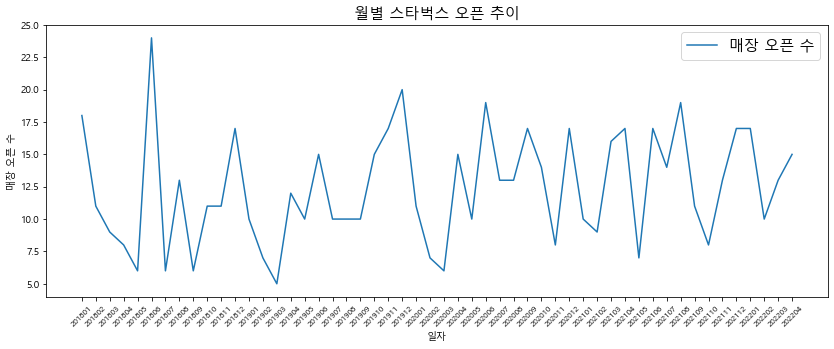

In [10]:
# 그림 크기
plt.figure(figsize=(14,5))

# 그림 제목
plt.title("월별 스타벅스 오픈 추이",fontdict={'fontsize' : 15})

# 축 이름
plt.xlabel("일자")
plt.ylabel("매장 오픈 수")

# 그림 그리기
plt.plot(df_6)

# 축 범위 설정
plt.ylim(4, 25)

# x축 레이블 설정
plt.xticks(size = 8, rotation='45')

# legend
plt.legend(labels=['매장 오픈 수'], fontsize = 15)


plt.show()

## 문제 2

### 출발 공항에 대해서 도착 공항별로 평균 출발 지연시간 평균 도착지연시간을 구해서 아래와 같이 DataFrame 을 만들어주세요


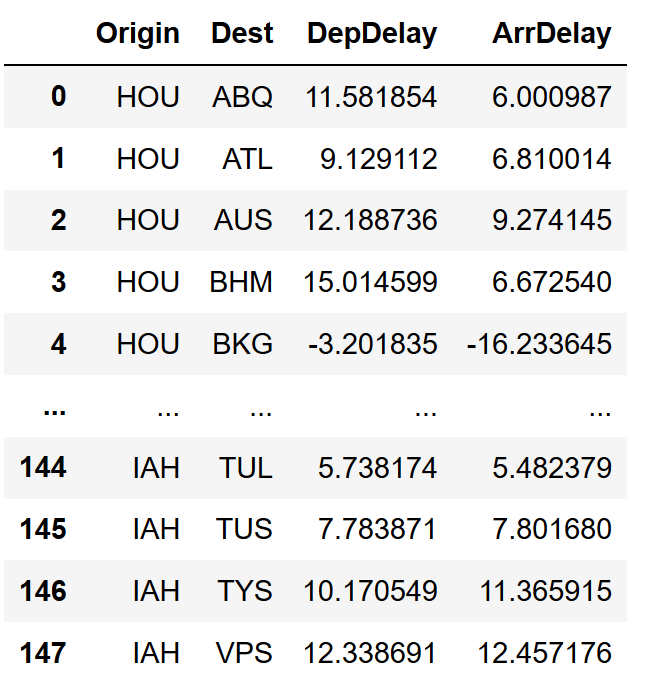

In [11]:
hflight = pd.read_csv("../data/hflight2.csv")

In [12]:
hflight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [13]:
df_2 = hflight.groupby(['Origin', 'Dest'])[['DepDelay', 'ArrDelay']].mean().reset_index()

In [14]:
df_2

,Origin,Dest,DepDelay,ArrDelay
0,HOU,ABQ,11.581854,6.000987
1,HOU,ATL,9.129112,6.810014
2,HOU,AUS,12.188736,9.274145
3,HOU,BHM,15.014599,6.672540
4,HOU,BKG,-3.201835,-16.233645
...,...,...,...,...
144,IAH,TUL,5.738174,5.482379
145,IAH,TUS,7.783871,7.801680
146,IAH,TYS,10.170549,11.365915
147,IAH,VPS,12.338691,12.457176


## 문제 3
### 목적지 공항에 대해 연착 건수를 구하고, 
### 연착 건수가 2000회 이상인 공항에 대한 데이터만 추출 
### col -> Dest :목적지 공항 / ArrDelay (연착은 5분이상)

In [15]:
hflight.loc[hflight['ArrDelay'] >= 5, '연착여부'] = 1 
hflight.loc[hflight['ArrDelay'] < 5, '연착여부'] = 0 

df_3 = hflight.groupby(['Dest'], as_index=True)[['연착여부']].sum()

df_3[df_3['연착여부'] >= 2000]

,연착여부
Dest,
ATL,2657.0
DAL,3360.0
DEN,2315.0
LAX,2641.0
MSY,2361.0
ORD,2220.0


## 문제 4
### 위의 결과를 바탕으로 목적지 공항 별 결항 횟수, 회항 횟수
### 운항 횟수를 구하시오 (Cancelled, Diverted, Air)
##### 운항 횟수는 결항과 회항을 제외한 것 

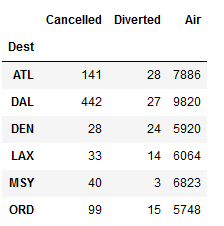

In [16]:
df_4 = hflight.groupby(['Dest'], as_index=True)[['Cancelled','Diverted']].sum().sort_index()
temp = pd.DataFrame(hflight['Dest'].value_counts()).sort_index()
df_4['Air'] = temp['Dest'] - df_4['Cancelled'] - df_4['Diverted']

df_4

,Cancelled,Diverted,Air
Dest,,,
ABQ,25,7,2780
AEX,12,2,710
AGS,0,0,1
AMA,32,8,1257
ANC,0,1,124
...,...,...,...
TUL,54,4,2866
TUS,15,2,1548
TYS,8,5,1197


## 문제 9 
### 설치되어 있지 않은 패키지를 설치할 때 사용하는 명령어는 무엇인가?

answer : pip install [패키지명]

## 문제 10
### DataFrame의 구조는 어떻게 되어 있는지 아래 데이터형을 순서대로 나열하세요.
### Series, numpy, DataFrame 

answer : DataFrame, Series, numpy